# Multibin NormSys

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyhf
import logging
from pyhf import Model
def prep_data(sourcedata):
    spec =  {
        'signal': {
            'signal': {
                'data': sourcedata['signal']['bindata']['sig'],
                'mods': [
                    {
                        'name': 'mu',
                        'type': 'normfactor',
                        'data': None
                    }
                ]
            },
            'background': {
                'data': sourcedata['signal']['bindata']['bkg'],
                'mods': [
                    {
                        'name': 'uncorr_bkguncrt_signal',
                        'type': 'shapesys',
                        'data': sourcedata['signal']['bindata']['bkgerr']
                    }
                ]
            }
        },
        'control': {
            'background': {
                'data': sourcedata['control']['bindata']['bkg'],
                'mods': [
                    {
                        'name': 'uncorr_bkguncrt_control',
                        'type': 'shapesys',
                        'data': sourcedata['control']['bindata']['bkgerr']
                    }
                ]
            }            
        }
    }
    pdf  = Model(spec)
    data = []
    for c in pdf.config.channel_order:
        data += sourcedata[c]['bindata']['data']
    data = data + pdf.config.auxdata
    return data, pdf

In [3]:
source = {
  "channels": {
    "signal": {
      "binning": [2,-0.5,1.5],
      "bindata": {
        "data":    [110.0, 155.0],
        "bkgerr":  [10.0, 10.0],
        "bkg":     [100.0, 150.0],
        "sig":     [10.0, 35.0]
      }
    },
    "control": {
      "binning": [2,-0.5,1.5],
      "bindata": {
        "data":    [205.0, 345.0],
        "bkg":     [200.0, 350.0],
        "bkgerr":  [5.0, 10.0]
      }
    }
  }
}

d,pdf = prep_data(source['channels'])

print (d)

init_pars = pdf.config.suggested_init()
par_bounds = pdf.config.suggested_bounds()


print (pdf.pdf(init_pars, d))

unconpars = pyhf.unconstrained_bestfit(d,pdf,init_pars,par_bounds)
print ('UNCON',unconpars)


# print d
# print pdf.expected_data(unconpars)


conpars = pyhf.constrained_bestfit(0.0,d,pdf,init_pars,par_bounds)
print ('CONS', conpars)


# print pdf.expected_data(conpars)

# # print '????',aux
# aux = pdf.expected_auxdata(conpars)
# # print '????',aux

# print 'ASIMOV',pyhf.generate_asimov_data(0.0,d,pdf,init_pars,par_bounds)

[110.0, 155.0, 205.0, 345.0, 100.0, 225.0, 1600.0, 1225.0]
6.05144397193e-15
UNCON [ 0.22045264  1.03856871  0.99297904  1.00277771  0.99682764]
CONS [ 0.          1.0500018   1.01333296  1.00277542  0.99682418]


/home/mcf/anaconda3/lib/python3.5/site-packages/pyhf-0.0.3-py3.5.egg/pyhf/__init__.py:15: RuntimeWarning: divide by zero encountered in log
/home/mcf/anaconda3/lib/python3.5/site-packages/pyhf-0.0.3-py3.5.egg/pyhf/__init__.py:341: RuntimeWarning: divide by zero encountered in log
/home/mcf/anaconda3/lib/python3.5/site-packages/pyhf-0.0.3-py3.5.egg/pyhf/__init__.py:333: RuntimeWarning: divide by zero encountered in log


/home/mcf/anaconda3/lib/python3.5/site-packages/pyhf-0.0.3-py3.5.egg/pyhf/__init__.py:15: RuntimeWarning: divide by zero encountered in log
/home/mcf/anaconda3/lib/python3.5/site-packages/pyhf-0.0.3-py3.5.egg/pyhf/__init__.py:341: RuntimeWarning: divide by zero encountered in log
/home/mcf/anaconda3/lib/python3.5/site-packages/pyhf-0.0.3-py3.5.egg/pyhf/__init__.py:333: RuntimeWarning: divide by zero encountered in log
/home/mcf/anaconda3/lib/python3.5/site-packages/pyhf-0.0.3-py3.5.egg/pyhf/__init__.py:403: RuntimeWarning: divide by zero encountered in double_scalars


{'exp': [0.46551656505141625,
  0.6232637006256001,
  0.8658618883955719,
  1.2109240648612507,
  1.6356314004902488],
 'obs': 1.0275341249967154}

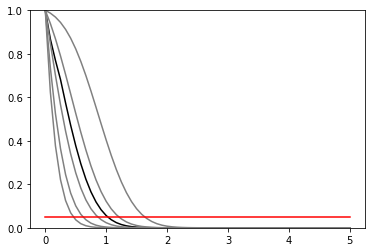

In [4]:
def plot_results(testmus,cls_obs, cls_exp, test_size = 0.05):
    plt.plot(mutests,cls_obs, c = 'k')
    for i,c in zip(range(5),['grey','grey','grey','grey','grey']):
        plt.plot(mutests,cls_exp[i], c = c)
    plt.plot(testmus,[test_size]*len(testmus), c = 'r')
    plt.ylim(0,1)

def invert_interval(testmus,cls_obs, cls_exp, test_size = 0.05):
    point05cross = {'exp':[],'obs':None}
    for cls_exp_sigma in cls_exp:
        yvals = [x for x in cls_exp_sigma]
        point05cross['exp'].append(np.interp(test_size,list(reversed(yvals)),list(reversed(testmus))))
        
    yvals = cls_obs
    point05cross['obs'] = np.interp(test_size,list(reversed(yvals)),list(reversed(testmus)))
    return point05cross


pyhf.runOnePoint(1.0, d, pdf, init_pars, par_bounds)[-2:]


mutests = np.linspace(0,5,61)
tests = [pyhf.runOnePoint(muTest, d,pdf,init_pars, par_bounds)[-2:] for muTest in mutests]
cls_obs = [test[0]  for test in tests]
cls_exp = [[test[1][i]  for test in tests] for i in range(5)]

plot_results(mutests, cls_obs, cls_exp)

invert_interval(mutests, cls_obs, cls_exp)

In [5]:
pdf.config.par_map

{'mu': {'mod': None,
  'slice': slice(0, 1, None),
  'suggested_bounds': [[0, 10]],
  'suggested_init': [1.0]},
 'uncorr_bkguncrt_control': {'mod': <pyhf.shapesys_constraint at 0x7fe86c3b1550>,
  'slice': slice(3, 5, None),
  'suggested_bounds': [[0, 10], [0, 10]],
  'suggested_init': [1.0, 1.0]},
 'uncorr_bkguncrt_signal': {'mod': <pyhf.shapesys_constraint at 0x7fe86c3b1518>,
  'slice': slice(1, 3, None),
  'suggested_bounds': [[0, 10], [0, 10]],
  'suggested_init': [1.0, 1.0]}}